### 13강.1. Import Library 분석에 사용할 모듈

In [1]:
# 관리자 권한으로 실행했던 Anaconda Prompt와 동일한 역할하는 코드
!python -m pip install --user --upgrade pip

In [120]:
# Ignore the warnings
import warnings
# warnings.filterwarning("always")
warnings.filterwarnings("ignore")

# System related and Data input controls
import os

import re
from typing import *
import missingno as msno

# Web Scraping & Crawling
import requests
from bs4 import BeautifulSoup

# Data manipulation and visualization
import pandas as pd
import datetime
# pd.options.display.float_format = "{:, 0.2f}".format
# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 20
# pd.set_option("display.max_rows", None)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Modeling algorithms
# (1) General
import statsmodels.api as sm
from scipy import stats

# (2) Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [128]:
# pip install virtualenv
# pip3 install --user selenium
# python3 -m pip install request

In [3]:
from sys import executable                                                        
print(executable)
# C:\ProgramData\anaconda3\python.exe

import sys
print(sys.path)
# C:\programdata\anaconda3\lib\site-packages

# [Error]
# python3 -m ipykernel install --user
# /C:/ProgramData/anaconda3/python -m pip install request
# !{sys.executable} -m pip install request
# !conda install --yes --prefix {sys.prefix} request

C:\ProgramData\anaconda3\python.exe
['D:\\', 'C:\\ProgramData\\anaconda3\\python310.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\Users\\sooyeon Kang\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\ProgramData\\anaconda3\\lib\\site-packages', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\Pythonwin']


### 13강.2. Data Loading: 분석에 사용할 데이터 불러오기
* https://github.com/cherieuu/Online_lecture/blob/master/TSA_AtoZ/Practice3_DataAnalysis_Cycle_KK.ipynb
* https://aliencoder.tistory.com/11

In [63]:
# GetRepoTradInfoService
    # 기준일자, RP거래일자를 조회하여 
    # 건별거래, 매입증권별잔고금액, 통화별잔고금액을 제공하는 금융위원회_REPO거래정보
    
class GetRepoTradingInfoService():
    
    def __init__(self, request_url: str, repo_object = None):
        
        self.request_url = request_url
        self.repo_object = repo_object
            # encoding key = "XaWt3XckF7z5yo3JX%2BMBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg%3D%3D"
            # decoding key = "XaWt3XckF7z5yo3JX+MBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg=="
            
    def requestHTMLWebpage(self):
        
    # 공공데이터포털에서 xml 데이터 요청
        parameters ={
            "serviceKey" : "XaWt3XckF7z5yo3JX+MBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg==", 
            "numOfRows" : "1", 
            "pageNo" : "1", 
            "resultType" : "xml", 
            "basDt" : "20200304"}
            # 분석에 활용하기 위한 수집 방법
                # 파라미터 딕셔너리의 key값을 변수로 변환하여 class의 method return값을 for문을 통해 날짜별로 생성하여
                # 전역공간에 데이터프레임으로 일별 환매조건부매매채권 데이터 1차원 배열을 병합

        response = requests.get(
            self.request_url, 
            params = parameters)
            # request_url
                # [통화별잔고금액] http://apis.data.go.kr/1160100/service/GetRepoItemInfoService/getInteRateInfo
                # [건별거래조회] http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getCaseForTrad?
                # [매입증권별 잔고금액 조회] http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getBuyiSecuBala
        # print(response.content)
        # print(response.text)
                # 요청한 웹페이지 문서가 로드되었는지 확인용
            
    # 데이터 수집
        soup_object = BeautifulSoup(response.content, 
                            "lxml-xml")
        repo_object = soup_object.find_all("item")
        self.repo_object = repo_object
        
    def loadDatatoTag(self):
    
    # 데이터 정리
        RepoData: List = []
    
        for i in range(len(self.repo_object)):
            
            baseDate = self.repo_object[i].basDt.string.strip()
            repoID = self.repo_object[i].rpSqno.string.strip()
            repoBuySecurities = self.repo_object[i].rpBuyScrtKcd.string.strip()
            repoBuyApplyCurrent = self.repo_object[i].rpBuyAplCurCd.string.strip()
            repoBuyApplyCurrentNM = self.repo_object[i].rpBuyAplCurCdNm.string.strip()
            repoDepositTermCode = self.repo_object[i].rdptTermCcd.string.strip()
            repoDepositTermCodeNM = self.repo_object[i].rdptTermCcdNm.string.strip()
            repoRemainingExprDcd = self.repo_object[i].rpRmngExprDcd.string.strip()
            repoRemainingExprDcdNm = self.repo_object[i].rpRmngExprDcdNm.string.strip()
            purchaseBzTypeCode = self.repo_object[i].purcBzcTcd.string.strip()
            purchaseBzTypeCodeNM = self.repo_object[i].purcBzcTcdNm.string.strip()
            sellerBzTypeCode = self.repo_object[i].slrBzcTcd.string.strip()
            sellerBzTypeCodeNM = self.repo_object[i].slrBzcTcdNm.string.strip()
            repoInterest = self.repo_object[i].rpInrt.string.strip()
    
            RepoData = [
                baseDate, repoID, 
                repoBuySecurities, repoBuyApplyCurrent, repoBuyApplyCurrentNM, 
                repoDepositTermCode, repoDepositTermCodeNM, repoRemainingExprDcd, repoRemainingExprDcdNm,
                purchaseBzTypeCode, purchaseBzTypeCodeNM, sellerBzTypeCode, sellerBzTypeCodeNM, repoInterest]
    
            RepoData.append(RepoData)
        
        return RepoData

In [67]:
getRepoInstance = GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoItemInfoService/getInteRateInfo"
)

In [69]:
getRepoInstance.requestHTMLWebpage()

In [70]:
getRepoInstance.loadDatatoTag()

['20200304',
 '202003040001',
 '1150',
 'KRW',
 '대한민국 원',
 '1',
 '1영업일',
 '11',
 '1년이하',
 '0202',
 '은행(신탁)',
 '0101',
 '증권사',
 '1.43',
 [...]]

---

In [11]:
# DT교육과정 활용데이터 출처 : kaggle competitions download -c bike-sharing-demand

# location = "D:/Archive/EcommerceData_1.csv"
# ecommerce_raw_data = pd.read_csv(location, index_col = False, encoding = "latin")
# ecommerce_raw_data["InvoiceDate"] = pd.to_datetime(ecommerce_raw_data["InvoiceDate"])
# ecommerce_raw_data.info()
    # ctrl + ? + /
    # ecommerce_raw_data.describe(include = "all").T

In [100]:
class TimeSeriesCommercialDataAnalysis():
    
    def __init__(self, location: str, ecommerce_data = None):
        
        self.location = location
        self.ecommerce_data = ecommerce_data
       
    
    def loadData(self):
        ecommerce_raw_data = pd.read_csv(
            location, 
            index_col = False,
            encoding = "latin")
            # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79780: invalid start byte
        
        ecommerce_raw_data.drop(
            ["Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], 
            axis = 1, inplace = True)
        ecommerce_raw_data["Working Date"] = pd.to_datetime(ecommerce_raw_data["Working Date"])
        ecommerce_raw_data["created_at"] = pd.to_datetime(ecommerce_raw_data["created_at"])
        
    # EDA : 데이터 컬럼의 중복 여부 확인
        # ecommerce_raw_data["Working Date"] == ecommerce_raw_data["created_at"]
    # 날짜 변수(YYYY-MM-DD)를 인덱스(행)으로 선언 
        ecommerce_raw_data.set_index("created_at", inplace = True)
        # if ecommerce_raw_data.index.dtype == "int64":
            # ecommerce_raw_data.reset_index(drop = False, inplace = True)
    
    # 날짜 행의 중복을 해소하기 위해 데이터프레임 인덱싱
        # Setting frequency of time series data
        # ecommerce_raw_data = ecommerce_raw_data.asfreq("M")
            # ValueError: cannot reindex on an axis with duplicate labels
            
        print( ecommerce_raw_data.index.is_unique,
               ecommerce_raw_data.index.duplicated() )
        ecommerce_data = ecommerce_raw_data.copy()
        # ecommerce_data.flags.allows_duplicate_labels = False
        self.ecommerce_data = ecommerce_data.loc[~ecommerce_data.index.duplicated(), :]
        # ecommerce_data.asfreq("D")
        
        print(ecommerce_raw_data.info()) 
        return self.ecommerce_data

    
    def VisualizeTimeSeriesPlot(self):
        
        ecommerce_description = self.ecommerce_data.describe(include = "all").T
        ecommerce_description
        
        msno.bar(self.ecommerce_data)

        self.ecommerce_data[["grand_total", "price"]].plot(
            kind = "line", figsize = (20, 6),
            linewidth = 3, fontsize = 20,
            # xlim = ("2016-07-01", "2018-08-28"),
            ylim = (0, 1000) )
        plt.title("Time Series of Target", fontsize = 20)
        plt.xlabel("Index", fontsize = 15)
        plt.ylabel("Demand", fontsize = 15)
        plt.show()
        
        return ecommerce_description
        
    # sm.tsa.seasonal_decompose({분해요소], model={분해방법})
        # {분해요소} : DataFrame의 column
        # {분해방법} : 'additive'=(추세+계절성+잔차), 'multiplicative'=(추세*계절성*잔차)
        # 분해 방법은 상황에 따라 적절히 판단한다.
    
    # covariance = ( np.sum(X*Y) - len(X)*np.mean(Y) )/len(X)
    # covaraince = np.cov(X, Y)[0, 1]

In [101]:
TSA = TimeSeriesCommercialDataAnalysis(
    location = "D:/Archive/LargestEcommerceData_Pakistan.csv")

In [102]:
commerce_data = TSA.loadData()
    # 품목 ID, 주문 상태(완료, 취소, 환불), 주문 날짜, SKU, 가격, 수량, 총합계, 카테고리, 결제 방법 및 고객 ID

False [False  True  True ...  True  True  True]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2016-07-01 to NaT
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   sku                    584504 non-null  object        
 3   price                  584524 non-null  float64       
 4   qty_ordered            584524 non-null  float64       
 5   grand_total            584524 non-null  float64       
 6   increment_id           584524 non-null  object        
 7   category_name_1        584360 non-null  object        
 8   sales_commission_code  447349 non-null  object        
 9   discount_amount        584524 non-null  float64       
 10  payment_method         584524 non-null  object        
 11  Working Date           584524 non-null  dateti

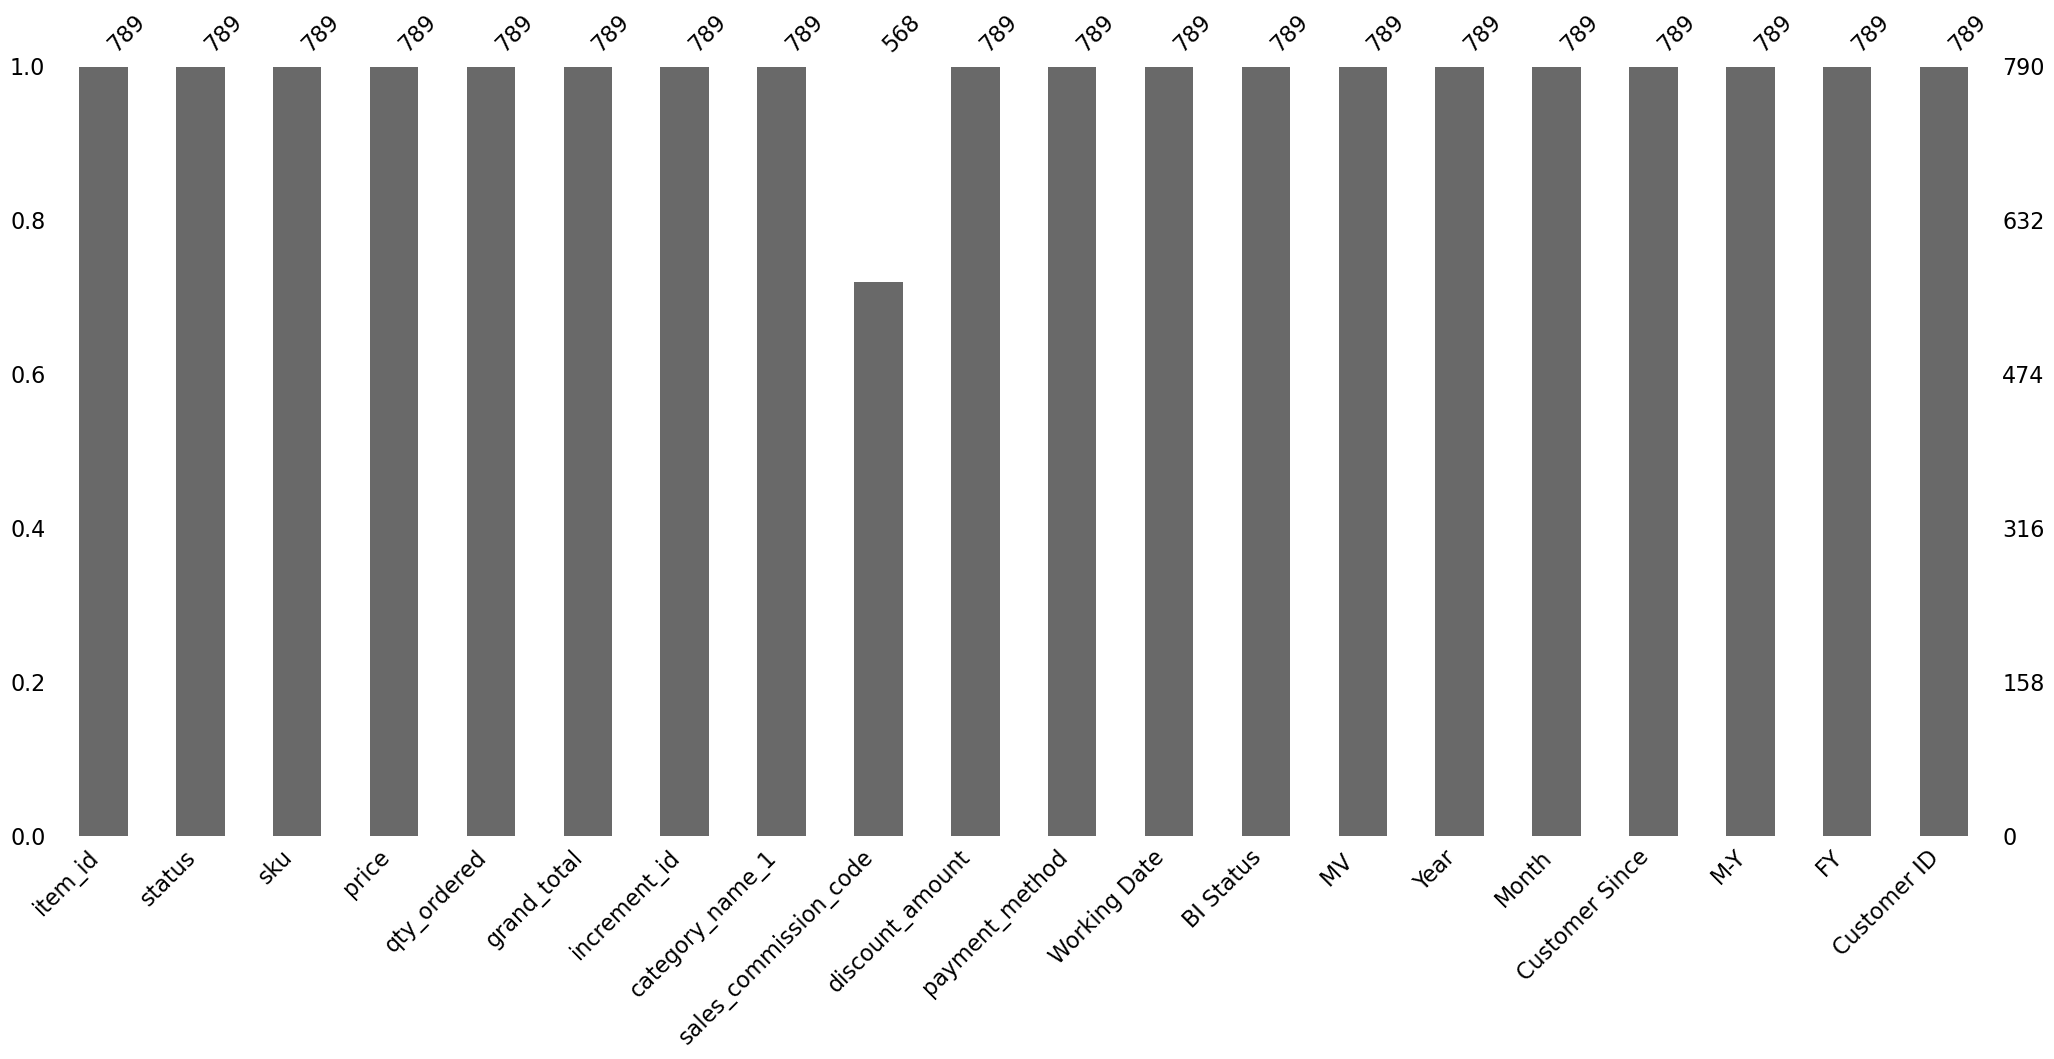

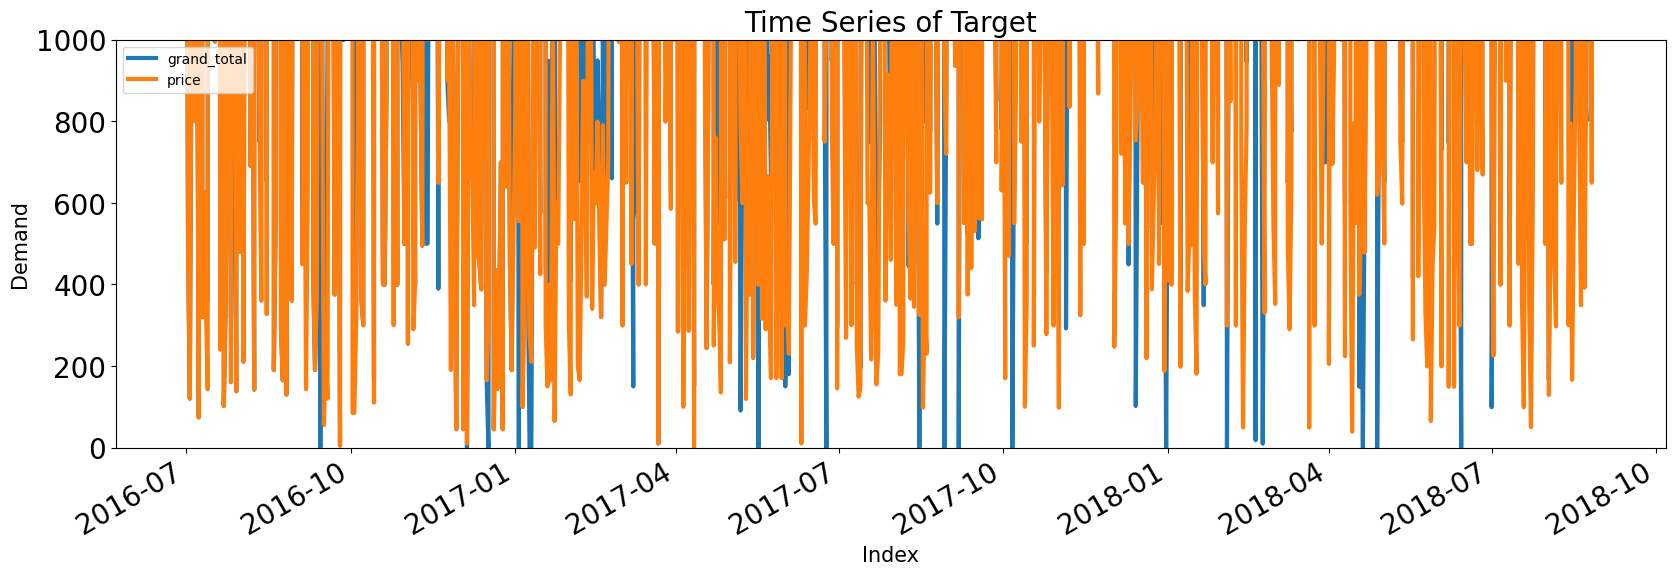

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
item_id,789.0,NaN,NaN,NaN,NaT,NaT,556334.589354,218436.571172,211131.0,388137.0,545963.0,742849.0,905100.0
status,789,9,complete,310,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku,789,730,kcc_krone deal,4,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,789.0,NaN,NaN,NaN,NaT,NaT,7827.023828,17671.98524,1.0,495.0,1150.0,4770.0,116699.0
qty_ordered,789.0,NaN,NaN,NaN,NaT,NaT,1.225602,1.02249,1.0,1.0,1.0,1.0,20.0
grand_total,789.0,NaN,NaN,NaN,NaT,NaT,8776.203029,19288.732634,0.0,798.0,1495.0,6277.0,165337.0
increment_id,789.0,789.0,100147443.0,1.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_name_1,789,16,Mobiles & Tablets,198,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_commission_code,568,51,\N,488,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_amount,789.0,NaN,NaN,NaN,NaT,NaT,178.330573,844.551149,0.0,0.0,0.0,0.0,12500.0


In [103]:
TSA.VisualizeTimeSeriesPlot()

In [105]:
print( np.all(np.isfinite(commerce_data["price"])) )
commerce_data.isnull().sum()

False


item_id                    1
status                     1
sku                        1
price                      1
qty_ordered                1
grand_total                1
increment_id               1
category_name_1            1
sales_commission_code    222
discount_amount            1
payment_method             1
Working Date               1
BI Status                  1
 MV                        1
Year                       1
Month                      1
Customer Since             1
M-Y                        1
FY                         1
Customer ID                1
dtype: int64

In [113]:
# dataframe[datafframe['column'].isnull()]
commerce_data[commerce_data["price"].isnull()]

,item_id,status,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
created_at,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
commerce_data.drop("NaT", axis = 0, inplace = True)
commerce_data.isnull().sum()

item_id                    0
status                     0
sku                        0
price                      0
qty_ordered                0
grand_total                0
increment_id               0
category_name_1            0
sales_commission_code    221
discount_amount            0
payment_method             0
Working Date               0
BI Status                  0
 MV                        0
Year                       0
Month                      0
Customer Since             0
M-Y                        0
FY                         0
Customer ID                0
dtype: int64

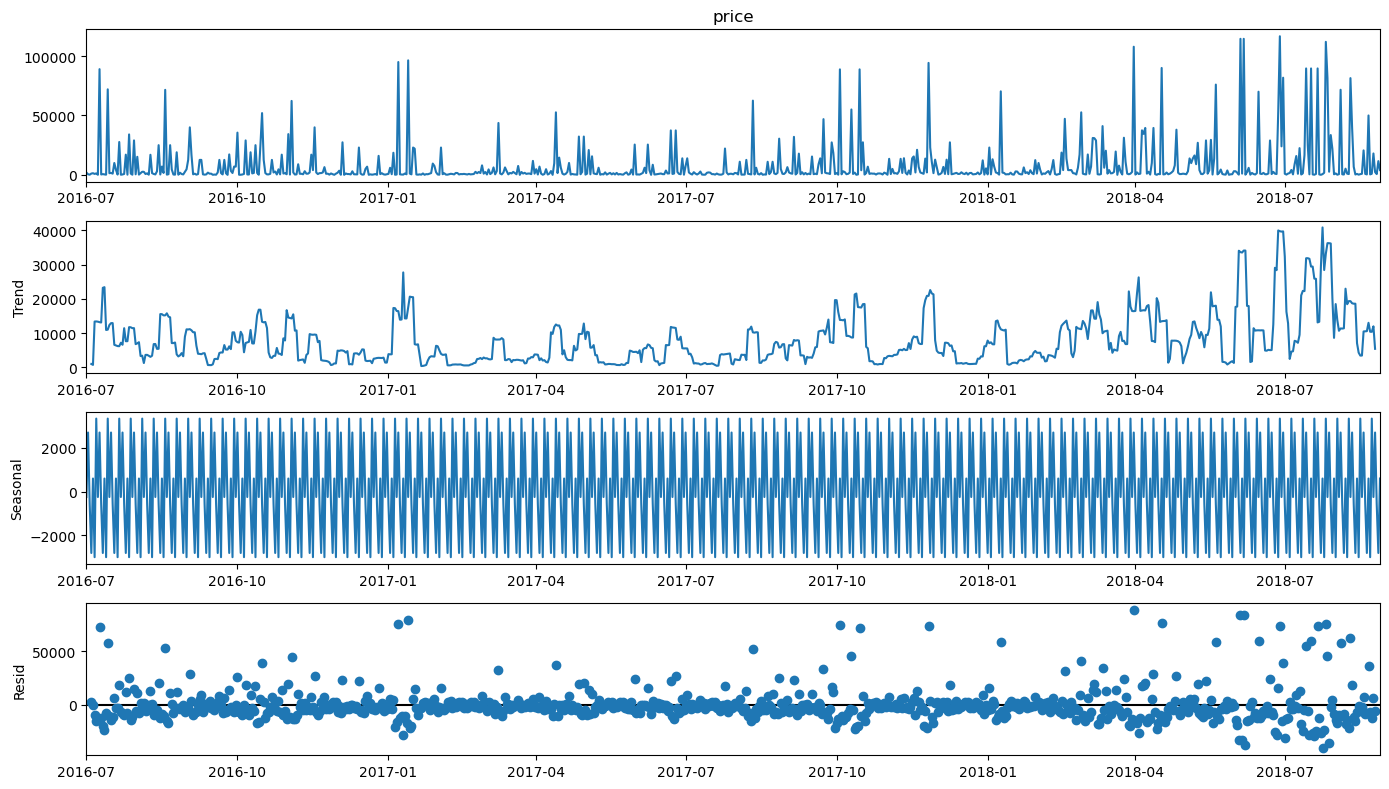

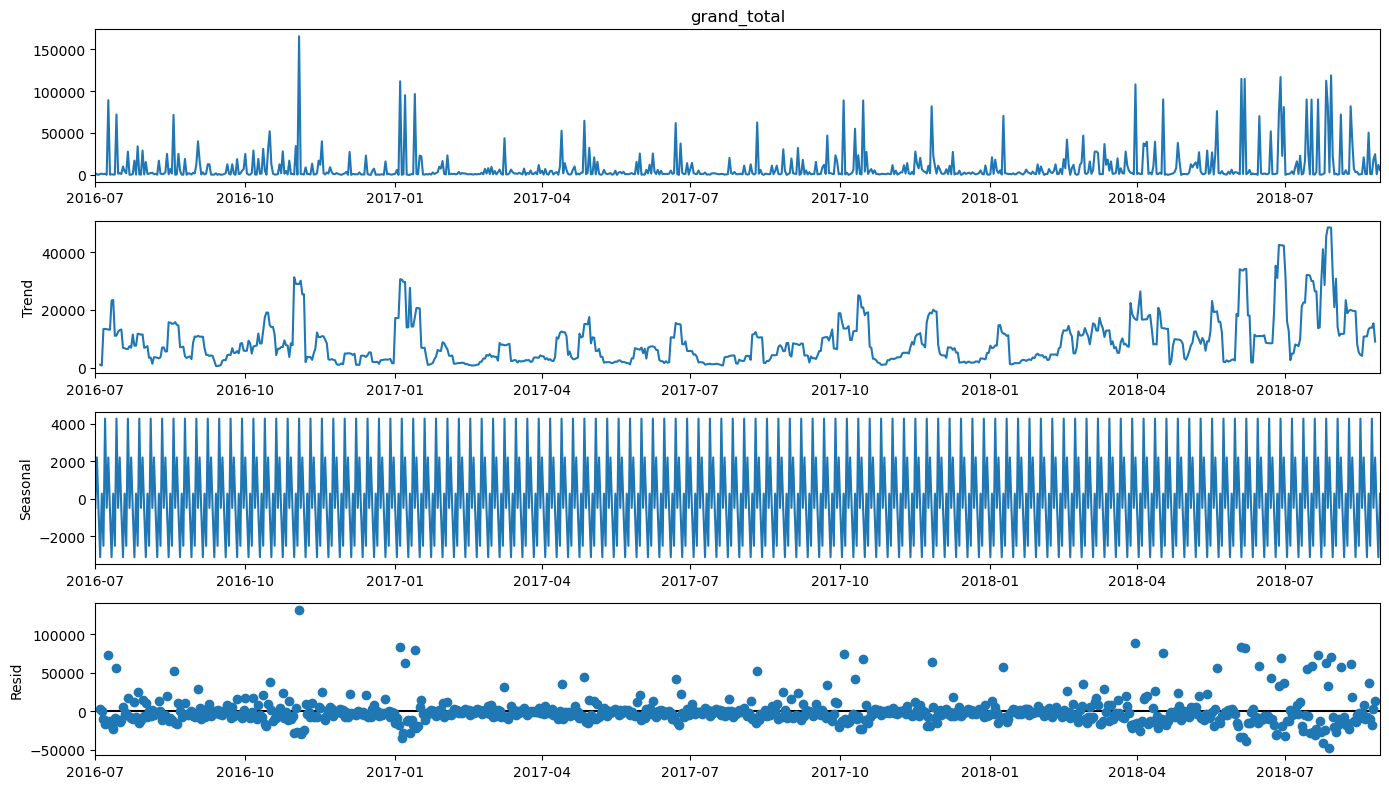

In [145]:
# 시계열 분해 : y(t) = Level * Trend * Seasonality * Noise
# ValueError: This function does not handle missing values

commerce_data = ecommerce_data.asfreq("D")
plt.rcParams["figure.figsize"] = (14, 8)
timeseries_price = sm.tsa.seasonal_decompose(
    x = commerce_data["price"],
    model = "additive")
        # additive : split data as trend + seasonal + residual
timeseries_price.plot()
timeseries_grand_total =sm.tsa.seasonal_decompose(
    x = commerce_data["grand_total"],
    model = "additive")
timeseries_grand_total.plot()
plt.show()
    # ValueError: You must specify a period or x must be a pandas object 
    # with a PeriodIndex or a DatetimeIndex with a freq not set to None